In [ ]:
install “Prometheus” & “Grafana”
==============================================

wget https://github.com/prometheus/prometheus/releases/download/v2.30.0/prometheus-2.30.0.linux-amd64.tar.gz

[root@mysqlprod02 lib]# pwd
/var/lib
[root@mysqlprod02 lib]# tar xvfz prometheus-2.30.0.linux-amd64.tar.gz
prometheus-2.30.0.linux-amd64/
prometheus-2.30.0.linux-amd64/consoles/

In [ ]:
After Installing lets create a service of Prometheus
==============================================================

[root@mysqlprod02 prometheus-2.30.0.linux-amd64]# cd /etc/systemd/system/

[root@mysqlprod02 system]# vi prometheus.service
[root@mysqlprod02 system]# 
[root@mysqlprod02 system]# cat prometheus.service 
[Unit]
Description=Prometheus
Wants=network-online.target
After=network-online.target

[Service]
ExecStart=/var/lib/prometheus-2.30.0.linux-amd64/prometheus --config.file=/var/lib/prometheus-2.30.0.linux-amd64/prometheus.yml
Restart=always
 
[Install]
WantedBy=default.target
[root@mysqlprod02 system]# 

[root@mysqlprod02 system]# chmod 755 prometheus.service
[root@mysqlprod02 system]# 
[root@mysqlprod02 system]# ls -rtl prometheus.service 
-rwxr-xr-x. 1 root root 276 Jun  7 23:14 prometheus.service
[root@mysqlprod02 system]# 


In [ ]:
After save this file reload the daemon service to verify our configuration file is correct and also enable 
and start the Prometheus service
==============================================================================================================

[root@mysqlprod02 system]# systemctl daemon-reload
[root@mysqlprod02 system]# 

[root@mysqlprod02 system]# systemctl enable prometheus.service
Created symlink /etc/systemd/system/default.target.wants/prometheus.service → /etc/systemd/system/prometheus.service.

[root@mysqlprod02 system]# systemctl start prometheus.service

[root@mysqlprod02 system]# systemctl status prometheus.service
● prometheus.service - Prometheus
   Loaded: loaded (/etc/systemd/system/prometheus.service; enabled; vendor preset: disabled)
   Active: failed (Result: exit-code) since Fri 2024-06-07 23:16:31 IST; 10s ago
  Process: 8363 ExecStart=/var/lib/prometheus-2.30.0.linux-amd64/prometheus --config.file=/var/lib/prometheus-2.30.0.linux>
 Main PID: 8363 (code=exited, status=203/EXEC)


[root@mysqlprod02 system]# tail /var/log/messages

Jun  7 23:19:11 mysqlprod02 setroubleshoot[8450]: SELinux is preventing /usr/lib/systemd/systemd from execute access on the file 
prometheus. For complete SELinux messages run: sealert -l 97eb5ff9-b0e2-43cc-a886-913741ffbb70
Jun  7 23:19:11 mysqlprod02 setroubleshoot[8450]: SELinux is preventing /usr/lib/systemd/systemd from execute access on the file 
prometheus.#012#012*****  Plugin catchall (100. confidence) suggests   **************************#01


[root@mysqlprod02 system]# semanage fcontext -a -t bin_t "/var/lib/prometheus-2.30.0.linux-amd64/prometheus"
[root@mysqlprod02 system]# 

[root@mysqlprod02 system]# restorecon -R -v /var/lib/prometheus-2.30.0.linux-amd64/prometheus
Relabeled /var/lib/prometheus-2.30.0.linux-amd64/prometheus from unconfined_u:object_r:var_lib_t:s0 to unconfined_u:object_r:bin_t:s0
[root@mysqlprod02 system]# 


[root@mysqlprod02 system]# systemctl start prometheus.service
[root@mysqlprod02 system]# systemctl status prometheus.service
● prometheus.service - Prometheus
   Loaded: loaded (/etc/systemd/system/prometheus.service; enabled; vendor preset: disabled)
   Active: active (running) since Fri 2024-06-07 23:29:10 IST; 4s ago
 Main PID: 8688 (prometheus)
    Tasks: 8 (limit: 29338)


In [ ]:
If all things work fine you will see you service is running properly and after that copy the Public IP of your 
Instance and hit with port 9090 “PublicIP:9090” you will see Prometheus UI
==========================================================================================

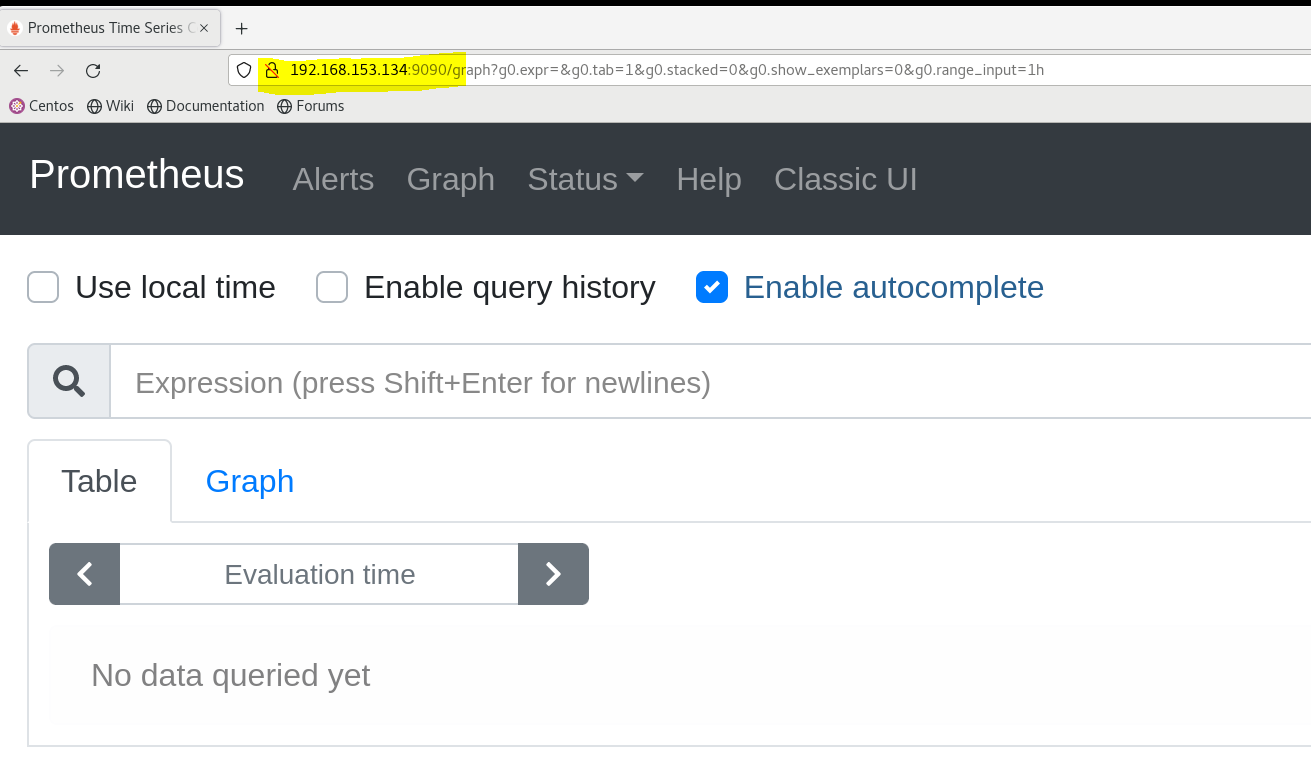

In [ ]:
After Successfully installing Prometheus lets install Grafana also
===========================================================================

[root@mysqlprod02 Downloads]# wget -q -O gpg.key https://rpm.grafana.com/gpg.key
[root@mysqlprod02 Downloads]# 
[root@mysqlprod02 Downloads]# rpm --import gpg.key
[root@mysqlprod02 Downloads]# 

Create /etc/yum.repos.d/grafana.repo with the following content:

[root@mysqlprod02 Downloads]# vi /etc/yum.repos.d/grafana.repo
[root@mysqlprod02 Downloads]# 
[root@mysqlprod02 Downloads]# cat /etc/yum.repos.d/grafana.repo
[grafana]
name=grafana
baseurl=https://rpm.grafana.com
repo_gpgcheck=1
enabled=1
gpgcheck=1
gpgkey=https://rpm.grafana.com/gpg.key
sslverify=1
sslcacert=/etc/pki/tls/certs/ca-bundle.crt
[root@mysqlprod02 Downloads]# 


[root@mysqlprod02 Downloads]# dnf install grafana

Installed:
  grafana-11.0.0-1.x86_64                                                                                              

Complete!
[root@mysqlprod02 Downloads]# 


[root@mysqlprod02 Downloads]# systemctl start grafana-server
[root@mysqlprod02 Downloads]# 


[root@mysqlprod02 Downloads]# systemctl enable grafana-server

Synchronizing state of grafana-server.service with SysV service script with /usr/lib/systemd/systemd-sysv-install.
Executing: /usr/lib/systemd/systemd-sysv-install enable grafana-server
Created symlink /etc/systemd/system/multi-user.target.wants/grafana-server.service → 
/usr/lib/systemd/system/grafana-server.service.


[root@mysqlprod02 Downloads]# systemctl status grafana-server

● grafana-server.service - Grafana instance
   Loaded: loaded (/usr/lib/systemd/system/grafana-server.service; enabled; vendor preset: disabled)
   Active: active (running) since Fri 2024-06-07 23:44:50 IST; 23s ago


In [ ]:
If all things work fine you will see you service is running properly and after that copy the Public IP of your
Instance and hit with port 3000 “PublicIP:3000” you will see Grafana UI (Note: While Installing Grafana if you see 
any “Warning” you can ignore it)

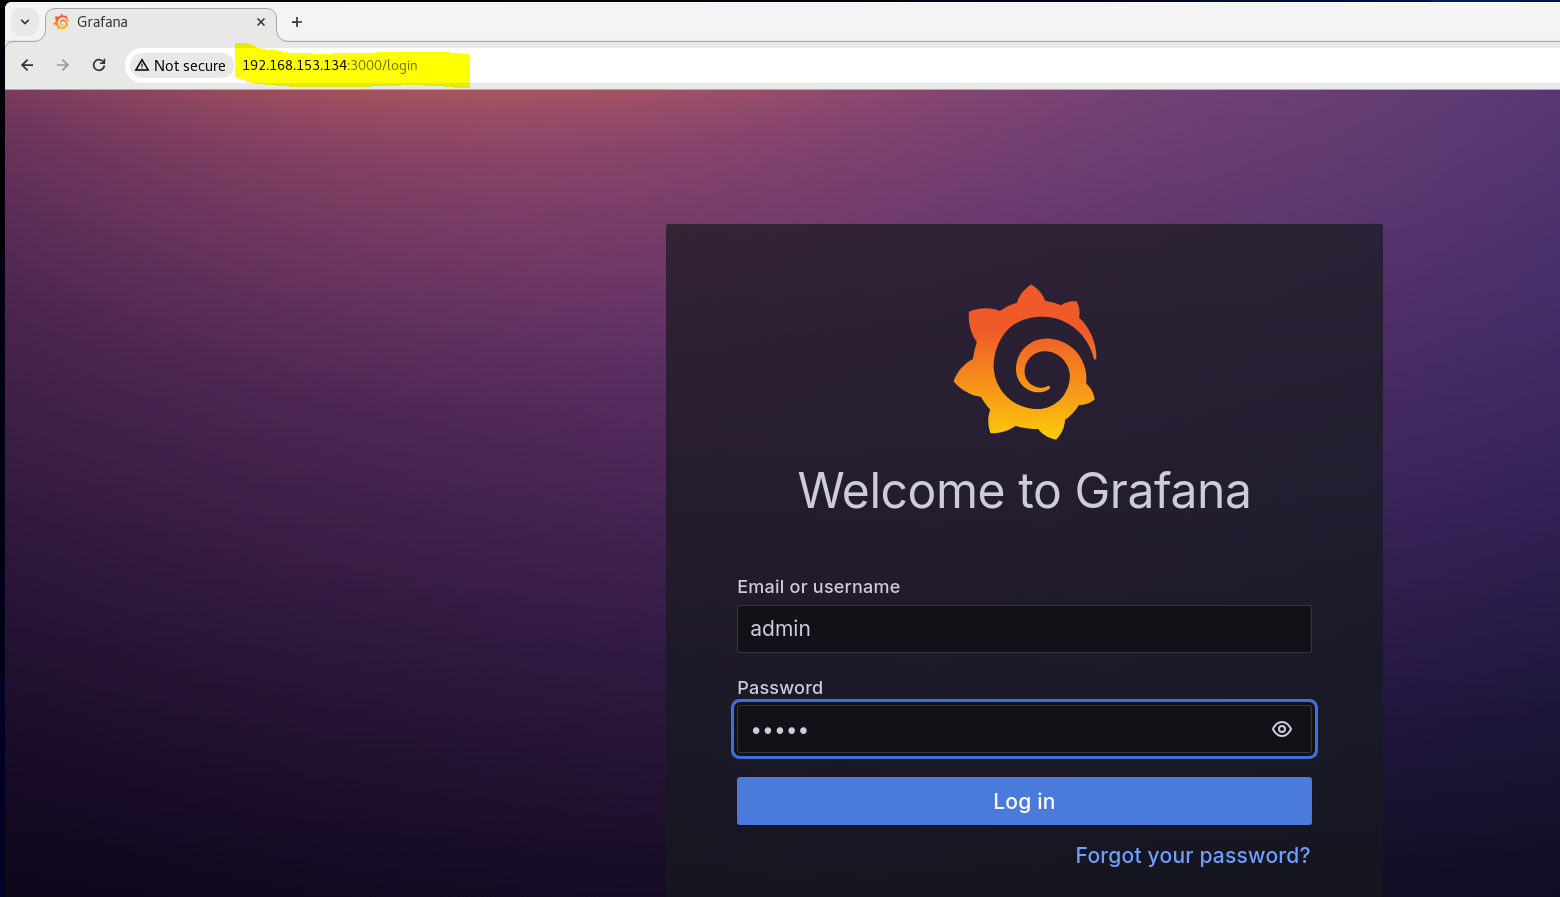

In [ ]:
The Initial Username and Password for Grafana is “admin/admin” after login you can change it.

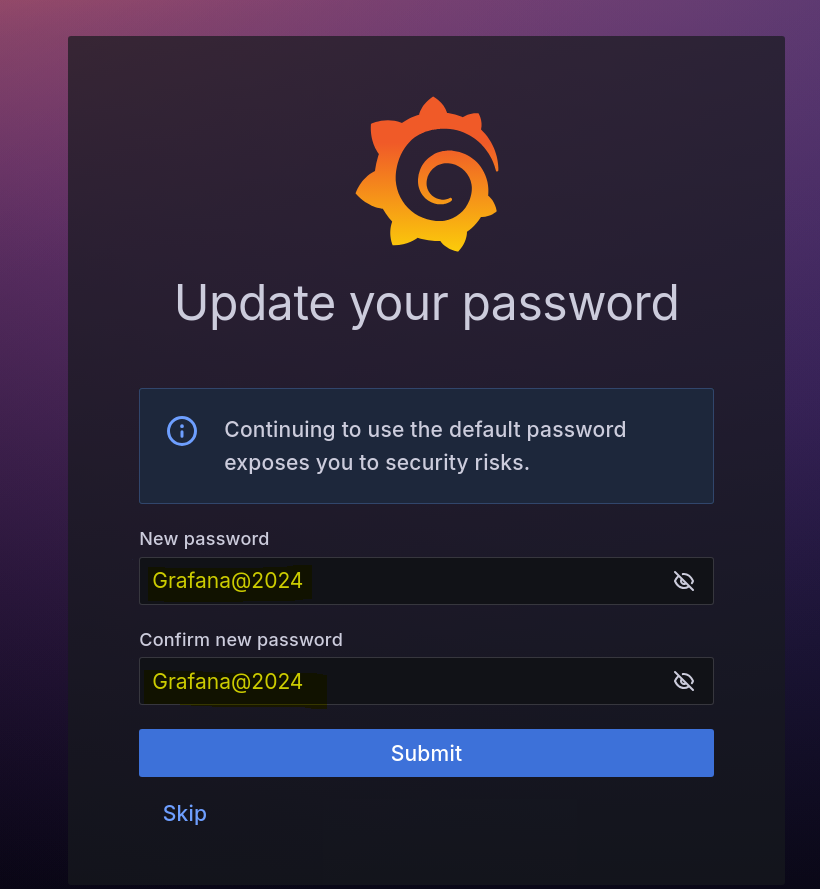

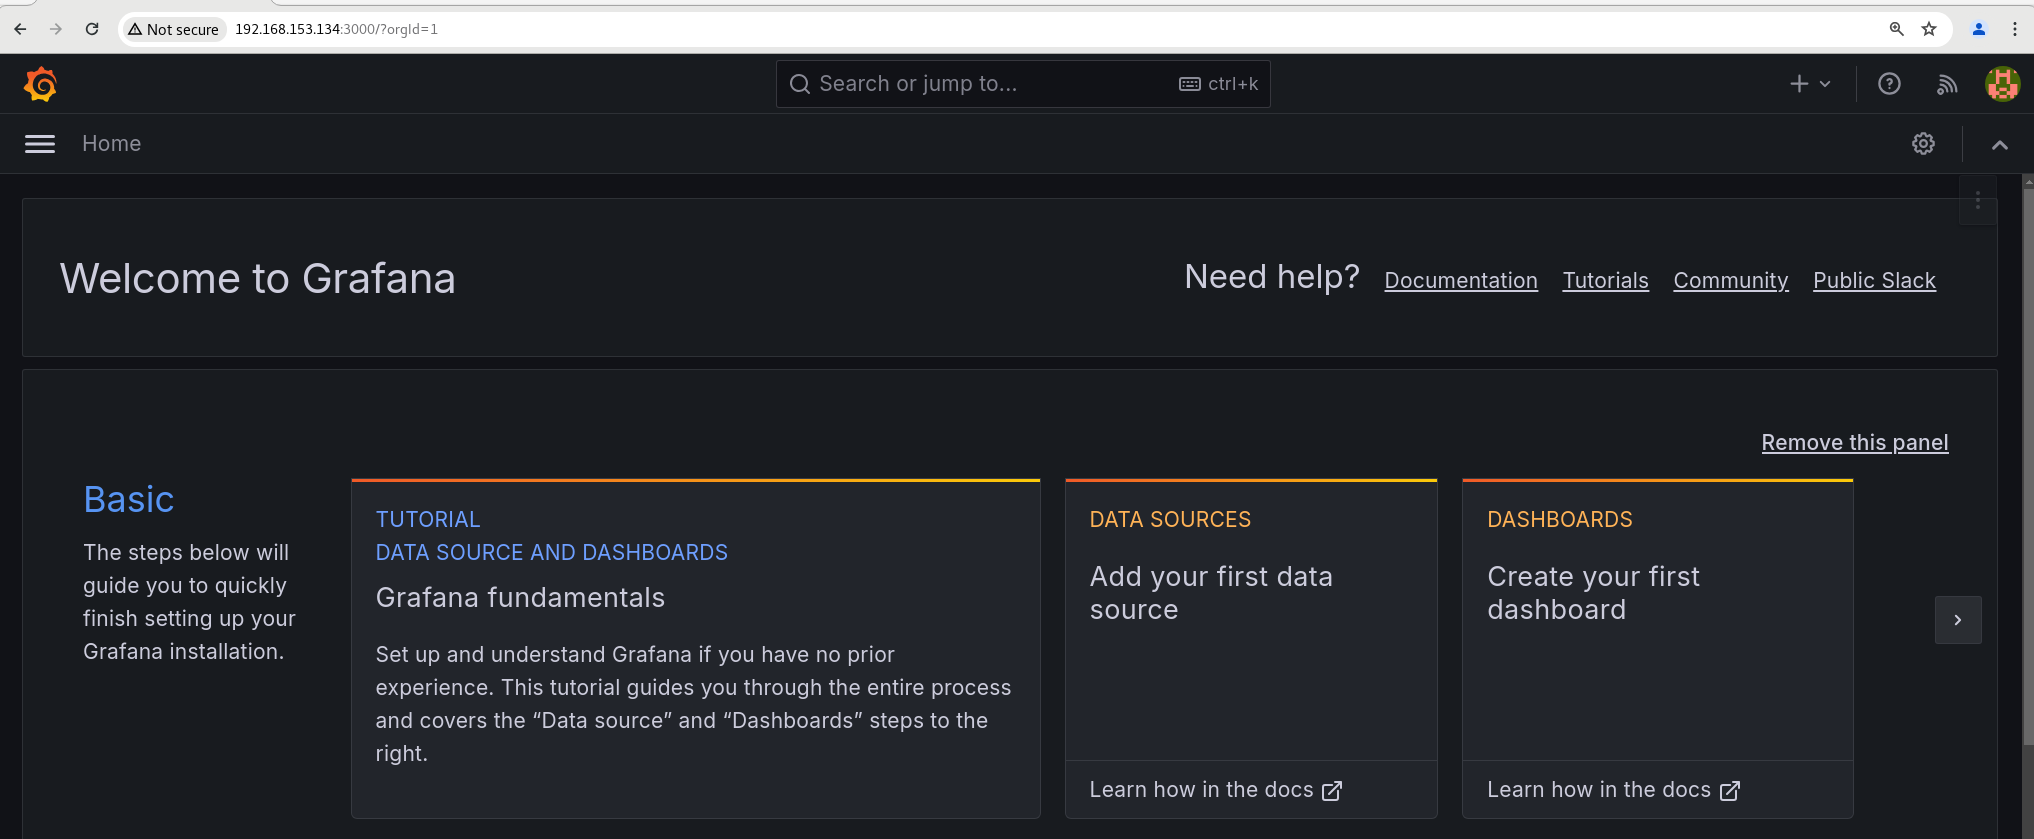

In [ ]:
After Installing Grafana and Prometheus let create User Group and User for Prometheus
==============================================================================================

[root@mysqlprod02 Downloads]# groupadd --system prometheus
[root@mysqlprod02 Downloads]# 

[root@mysqlprod02 Downloads]# useradd -s /sbin/nologin --system -g prometheus prometheus
[root@mysqlprod02 Downloads]# 

[root@mysqlprod02 Downloads]# cat /etc/group | grep prometheus
prometheus:x:973:

[root@mysqlprod02 Downloads]# cat /etc/passwd | grep prometheus
prometheus:x:973:973::/home/prometheus:/sbin/nologin
[root@mysqlprod02 Downloads]# 

In [ ]:
After adding user download and install MySQL Exporter
===============================================================

[root@mysqlprod02 Downloads]# curl -s https://api.github.com/repos/prometheus/mysqld_exporter/releases/latest   |
                                grep browser_download_url   | grep linux-amd64 | cut -d '"' -f 4   | wget -qi -
[root@mysqlprod02 Downloads]# 

[root@mysqlprod02 Downloads]# tar xvf mysqld_exporter*.tar.gz
mysqld_exporter-0.15.1.linux-amd64/
mysqld_exporter-0.15.1.linux-amd64/LICENSE
mysqld_exporter-0.15.1.linux-amd64/mysqld_exporter
mysqld_exporter-0.15.1.linux-amd64/NOTICE
[root@mysqlprod02 Downloads]# 

[root@mysqlprod02 Downloads]# mv  mysqld_exporter-*.linux-amd64/mysqld_exporter /usr/local/bin/
[root@mysqlprod02 Downloads]# 

[root@mysqlprod02 Downloads]# sudo chmod +x /usr/local/bin/mysqld_exporter
[root@mysqlprod02 Downloads]# 

[root@mysqlprod02 Downloads]# mysqld_exporter  --version
mysqld_exporter, version 0.15.1 (branch: HEAD, revision: cc349684494b5038ec5a52233bdca9eb9291e6f2)
  build user:       root@d89c15b9f5ad
  build date:       20231212-07:55:09
  go version:       go1.21.5
  platform:         linux/amd64
  tags:             unknown
[root@mysqlprod02 Downloads]# 

In [ ]:
As we install MySQL in first step so lets login into MySQL using root and create a user to 
collect the matrices of MySQL
====================================================================================

mysql> CREATE USER 'mysqld_exporter'@'localhost' IDENTIFIED BY 'Mysqldexp@2024';
Query OK, 0 rows affected (0.17 sec)

mysql> GRANT PROCESS, REPLICATION CLIENT, SELECT ON *.* TO 'mysqld_exporter'@'localhost';
Query OK, 0 rows affected (0.02 sec)

mysql> FLUSH PRIVILEGES;
Query OK, 0 rows affected (0.04 sec)


Now create database credentials file
===========================================

[root@mysqlprod02 Downloads]# vim /etc/.mysqld_exporter.cnf
[root@mysqlprod02 Downloads]# 
[root@mysqlprod02 Downloads]# cat /etc/.mysqld_exporter.cnf
[client]
user=mysqld_exporter
password=Mysqldexp@2024
[root@mysqlprod02 Downloads]# 

[root@mysqlprod02 Downloads]# chown root:prometheus /etc/.mysqld_exporter.cnf
[root@mysqlprod02 Downloads]# 


In [ ]:

Now create a service for mysql exporter to gather data
=================================================================

[root@mysqlprod02 Downloads]# vim /etc/systemd/system/mysql_exporter.service
[root@mysqlprod02 Downloads]# 
[root@mysqlprod02 Downloads]# cat /etc/systemd/system/mysql_exporter.service
[Unit]
Description=Prometheus MySQL Exporter
After=network.target
User=prometheus
Group=prometheus

[Service]
Type=simple
Restart=always
ExecStart=/usr/local/bin/mysqld_exporter \
--config.my-cnf /etc/.mysqld_exporter.cnf \
--collect.global_status \
--collect.info_schema.innodb_metrics \
--collect.auto_increment.columns \
--collect.info_schema.processlist \
--collect.binlog_size \
--collect.info_schema.tablestats \
--collect.global_variables \
--collect.info_schema.query_response_time \
--collect.info_schema.userstats \
--collect.info_schema.tables \
--collect.perf_schema.tablelocks \
--collect.perf_schema.file_events \
--collect.perf_schema.eventswaits \
--collect.perf_schema.indexiowaits \
--collect.perf_schema.tableiowaits \
--collect.slave_status \
--web.listen-address=0.0.0.0:9104

[Install]
WantedBy=multi-user.target
[root@mysqlprod02 Downloads]# 


[root@mysqlprod02 Downloads]# sudo systemctl daemon-reload
[root@mysqlprod02 Downloads]# systemctl enable mysql_exporter
Created symlink /etc/systemd/system/multi-user.target.wants/mysql_exporter.service → /etc/systemd/system/mysql_exporter.service.
[root@mysqlprod02 Downloads]# systemctl start mysql_exporter
[root@mysqlprod02 Downloads]# systemctl status mysql_exporter
● mysql_exporter.service - Prometheus MySQL Exporter
   Loaded: loaded (/etc/systemd/system/mysql_exporter.service; enabled; vendor preset: disabled)
   Active: failed (Result: exit-code) since Sat 2024-06-08 00:11:49 IST; 9s ago

[root@mysqlprod02 Downloads]# tail /var/log/messages
Jun  8 00:11:56 mysqlprod02 setroubleshoot[44587]: SELinux is preventing /usr/lib/systemd/systemd from execute access on the 
file mysqld_exporter. For complete SELinux messages run: sealert -l b4ab0292-6aa1-424a-970c-bfe6a44bfd48
Jun  8 00:11:56 mysqlprod02 setro


[root@mysqlprod02 Downloads]# semanage fcontext -a -t bin_t "/usr/local/bin/mysqld_exporter"
[root@mysqlprod02 Downloads]# 
[root@mysqlprod02 Downloads]# restorecon -R -v /usr/local/bin/mysqld_exporter
Relabeled /usr/local/bin/mysqld_exporter from unconfined_u:object_r:user_home_t:s0 to unconfined_u:object_r:bin_t:s0
[root@mysqlprod02 Downloads]# 

[root@mysqlprod02 Downloads]# systemctl start mysql_exporter
[root@mysqlprod02 Downloads]# 

[root@mysqlprod02 Downloads]# systemctl status mysql_exporter
● mysql_exporter.service - Prometheus MySQL Exporter
   Loaded: loaded (/etc/systemd/system/mysql_exporter.service; enabled; vendor preset: disabled)
   Active: active (running) since Sat 2024-06-08 01:42:34 IST; 5s ago
 Main PID: 45952 (mysqld_exporter)


In [ ]:
Now configure the endpoint in “Prometheus.yaml” file
===========================================================

[root@mysqlprod02 prometheus-2.30.0.linux-amd64]# vi prometheus.yml
[root@mysqlprod02 prometheus-2.30.0.linux-amd64]# 

 [root@mysqlprod02 prometheus-2.30.0.linux-amd64]# cat prometheus.yml
global:
  scrape_interval: 15s
  evaluation_interval: 15s
scrape_configs:
 - job_name: prometheus
   static_configs:
    - targets:
       - 192.168.153.134:9090
       
 - job_name: mysql_exporter
   static_configs:
    - targets:
       - 192.168.153.134:9104



Now save this file and restart Prometheus service
========================================================

[root@mysqlprod02 prometheus-2.30.0.linux-amd64]# systemctl restart prometheus.service
[root@mysqlprod02 prometheus-2.30.0.linux-amd64]# 

In [ ]:
Now go to Prometheus dashboard “Staus → Targets” go to targets you can see our exporter are up and running and you 
can verify also with click on mysqld exporter endpoint you will see data

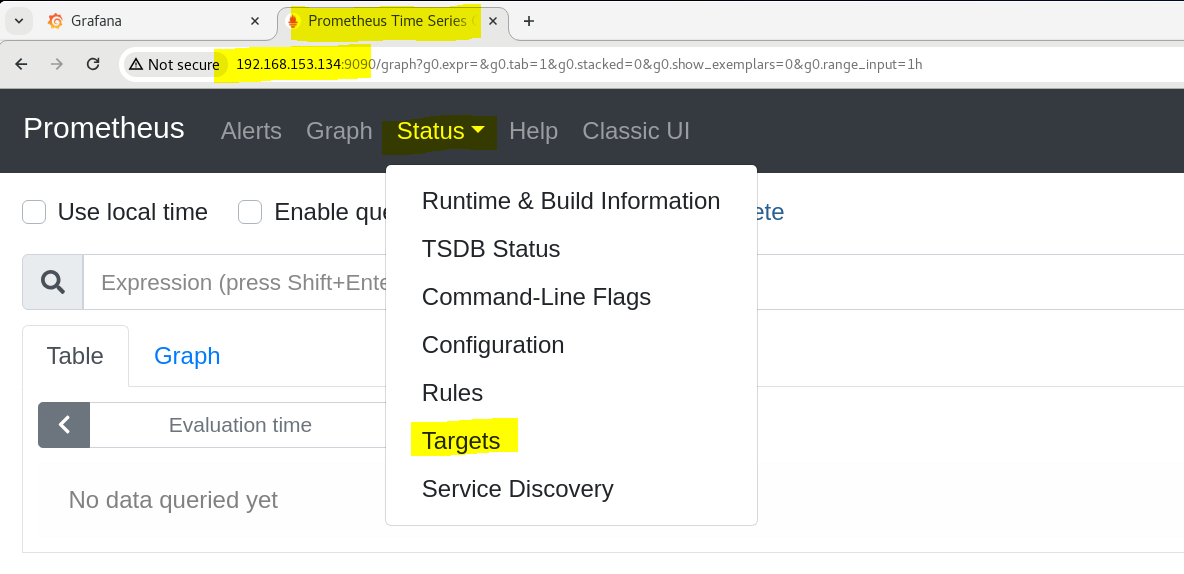

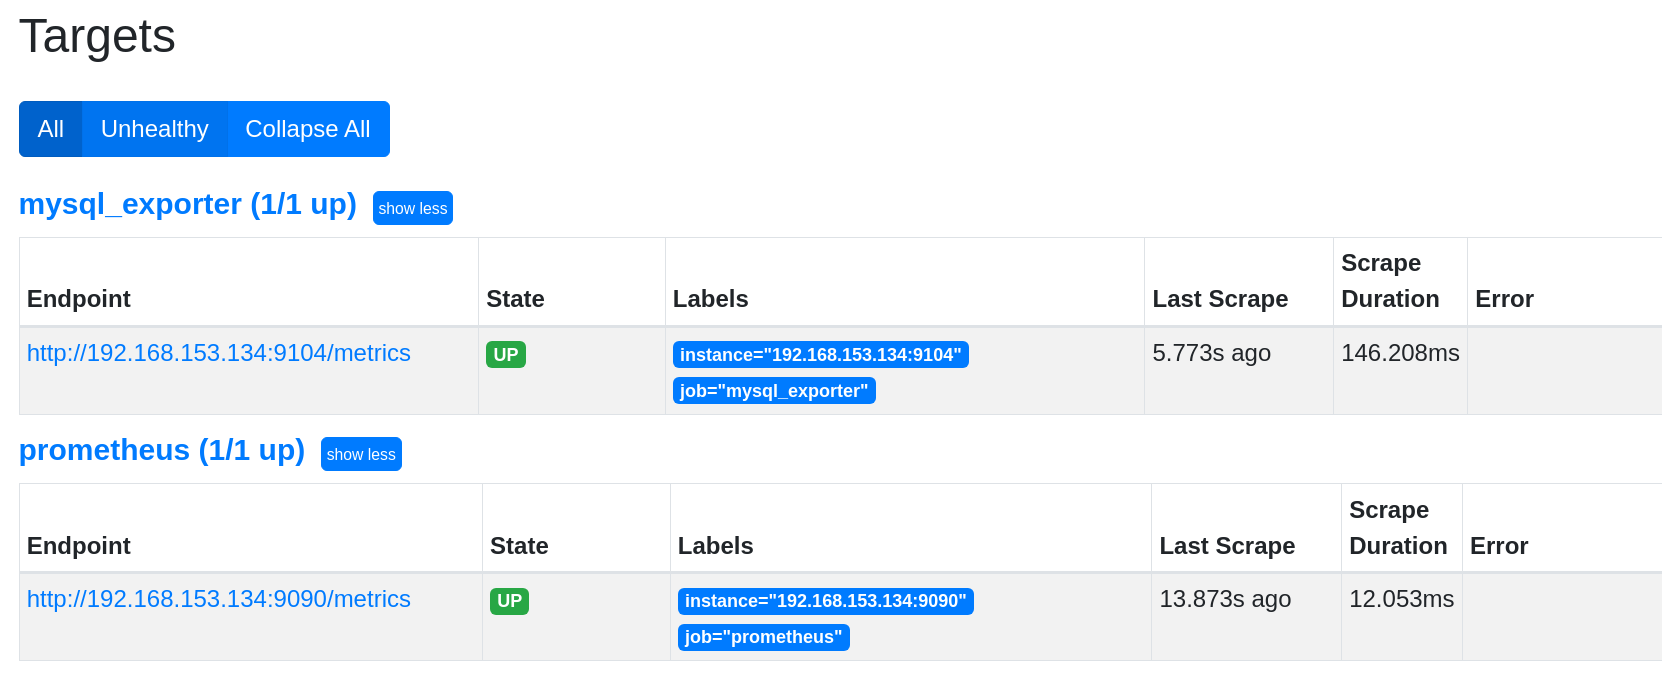

In [ ]:
Now to to Grafana and click on “Home → Administration → Data Source”

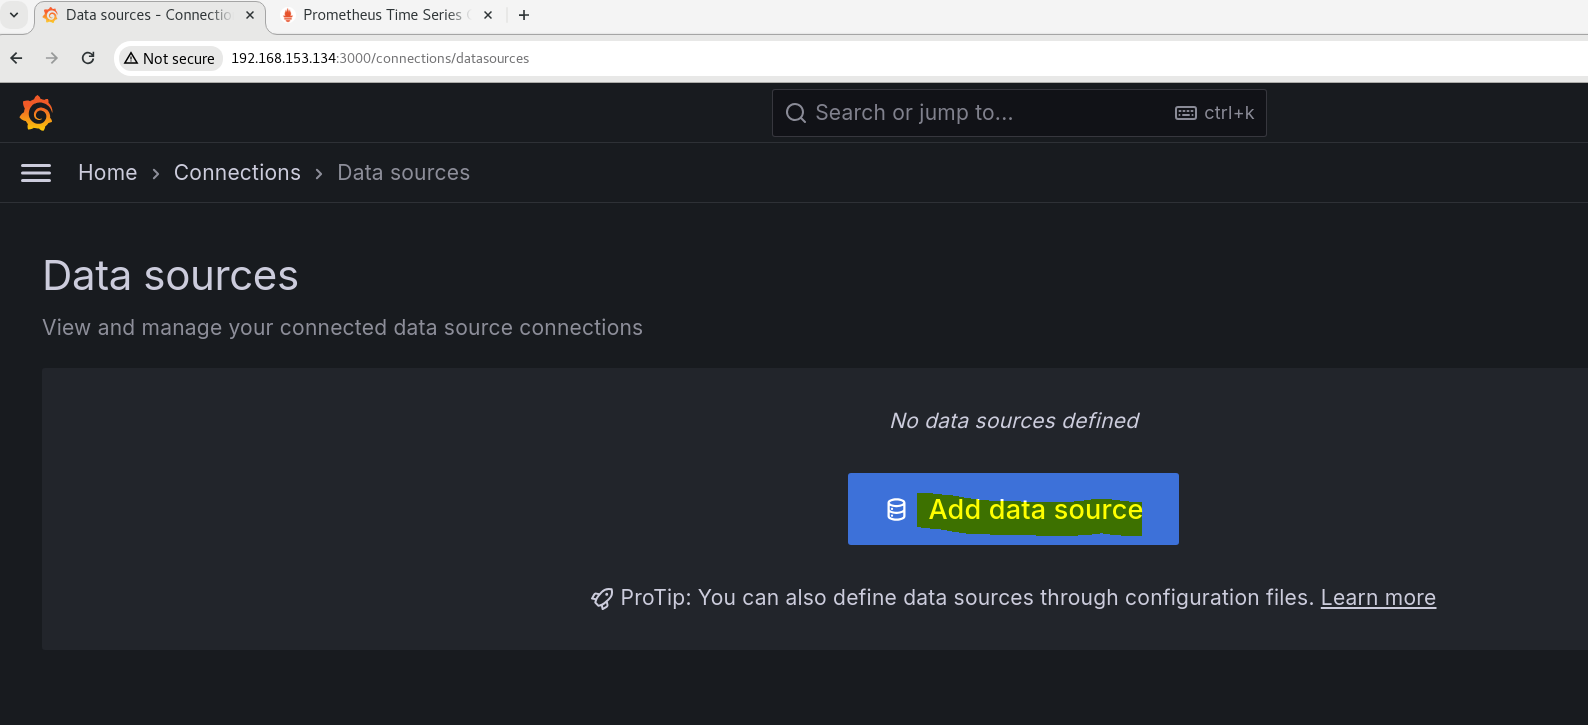

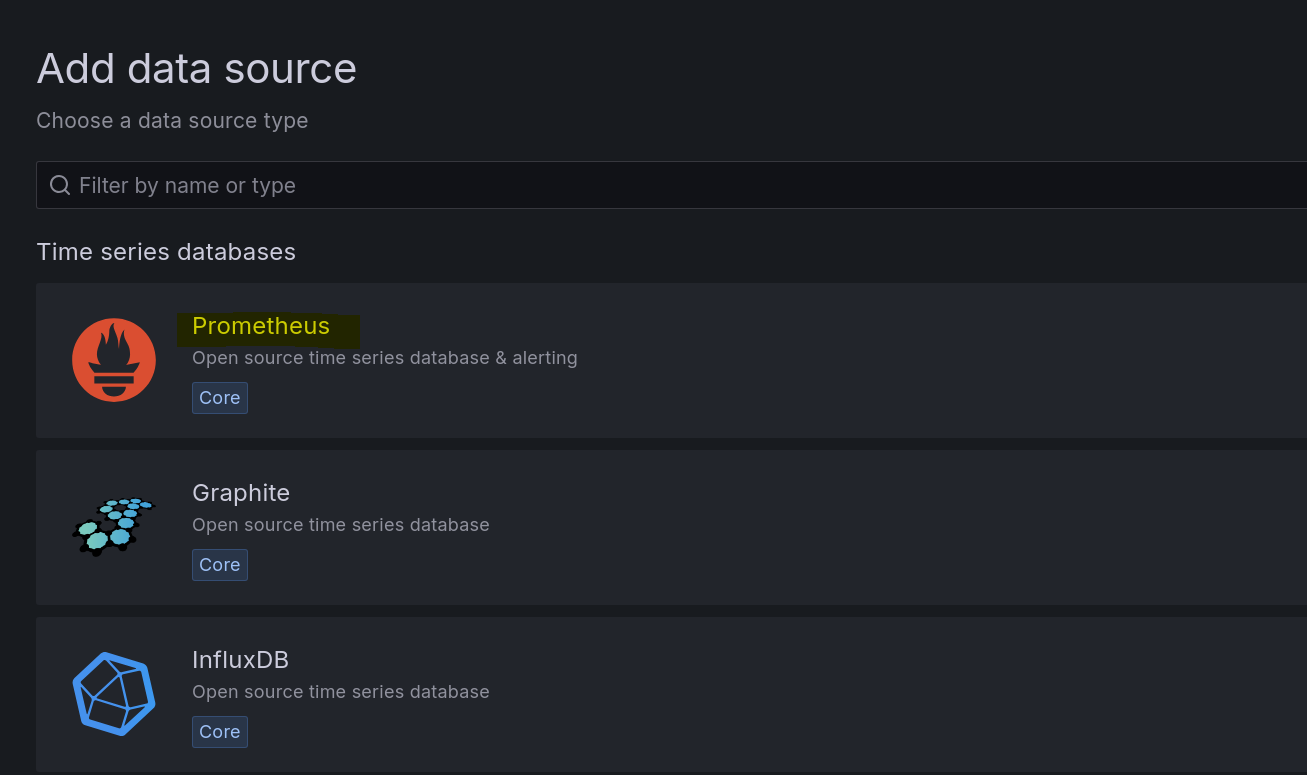

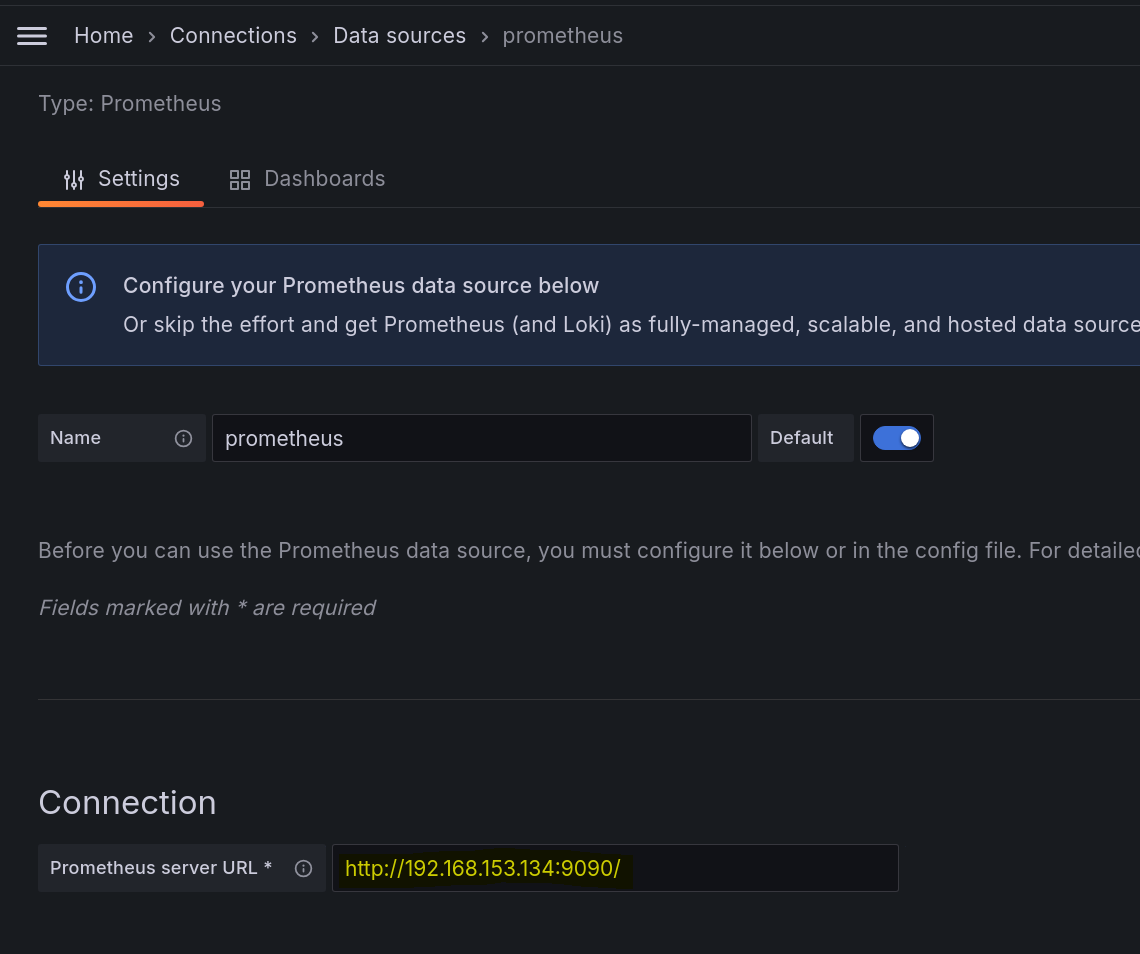

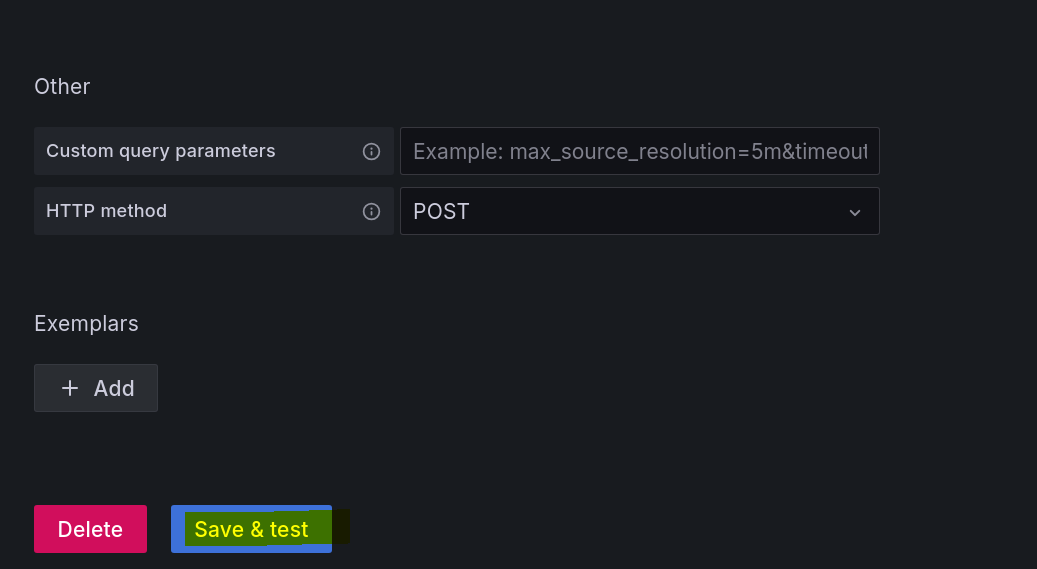

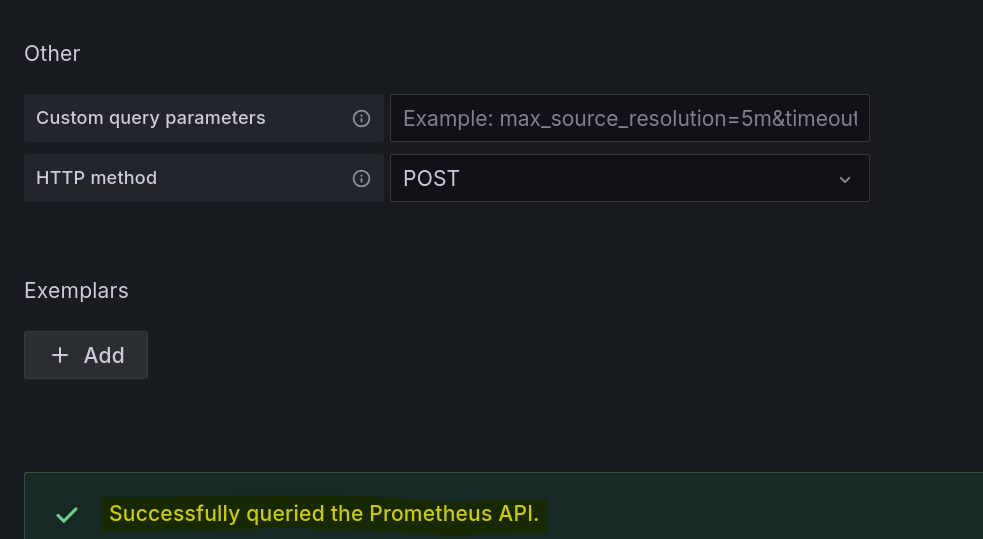

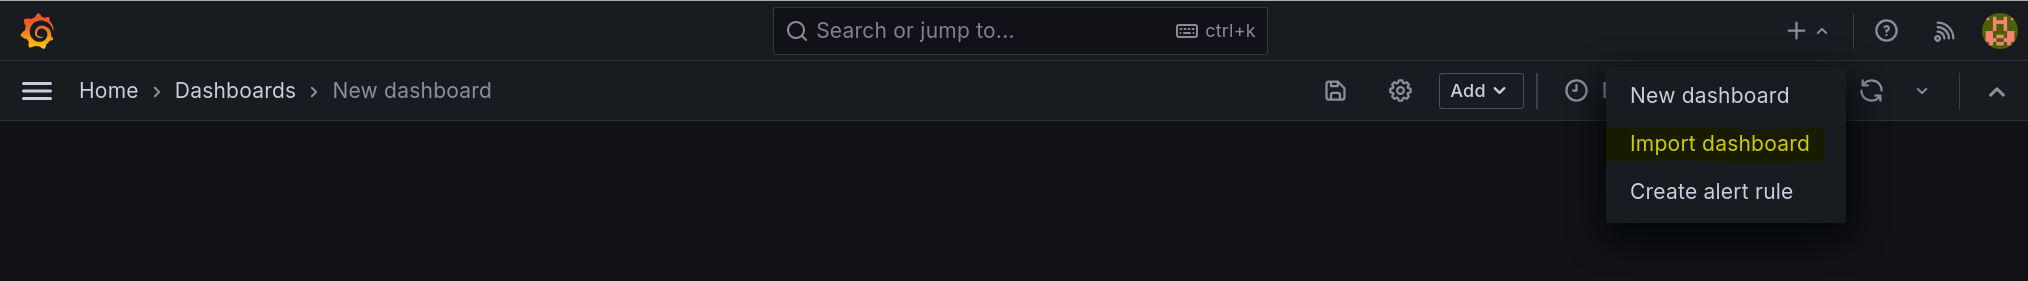

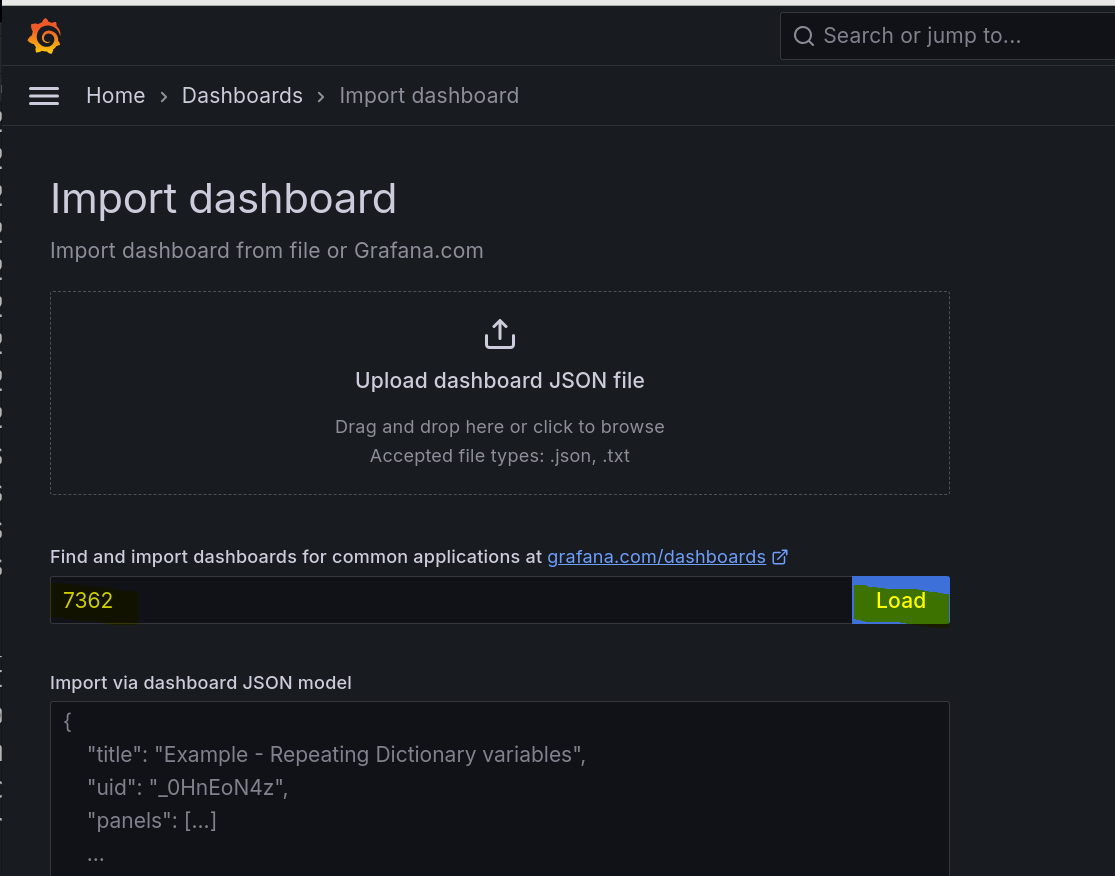

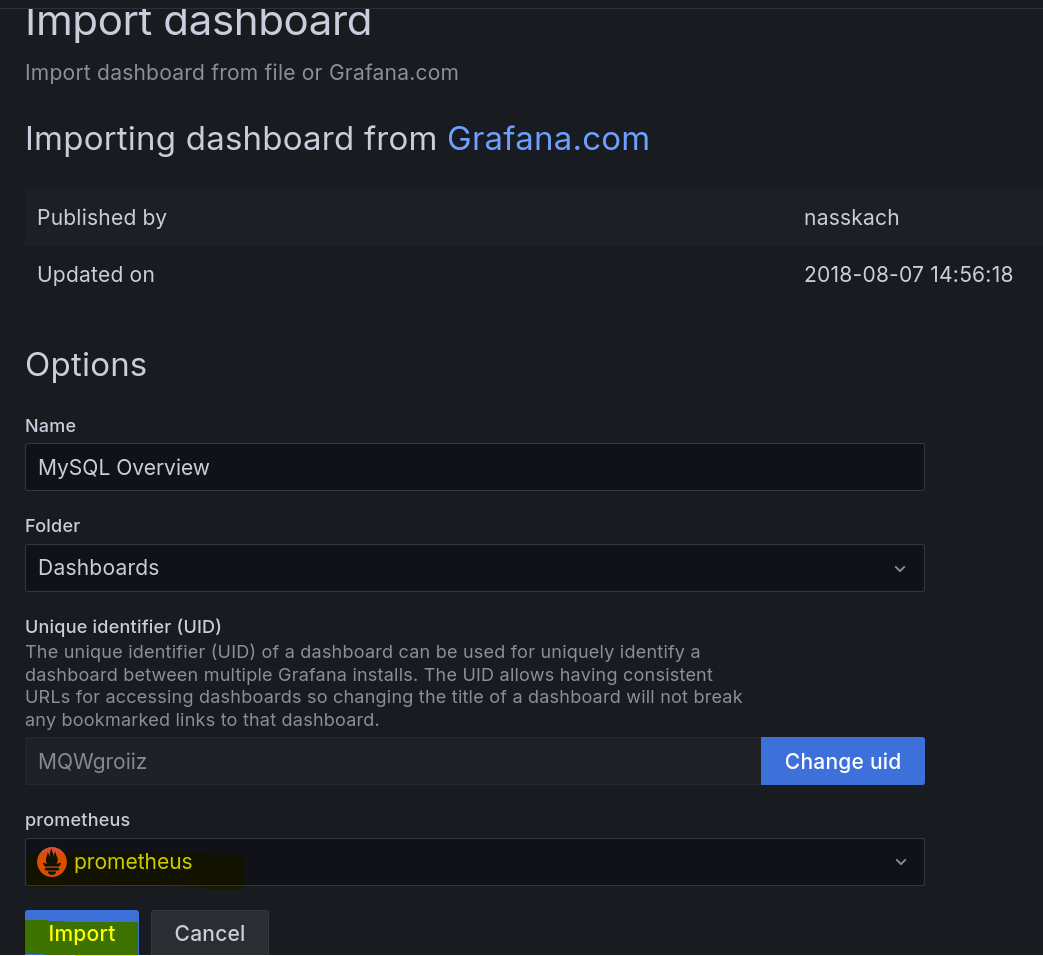

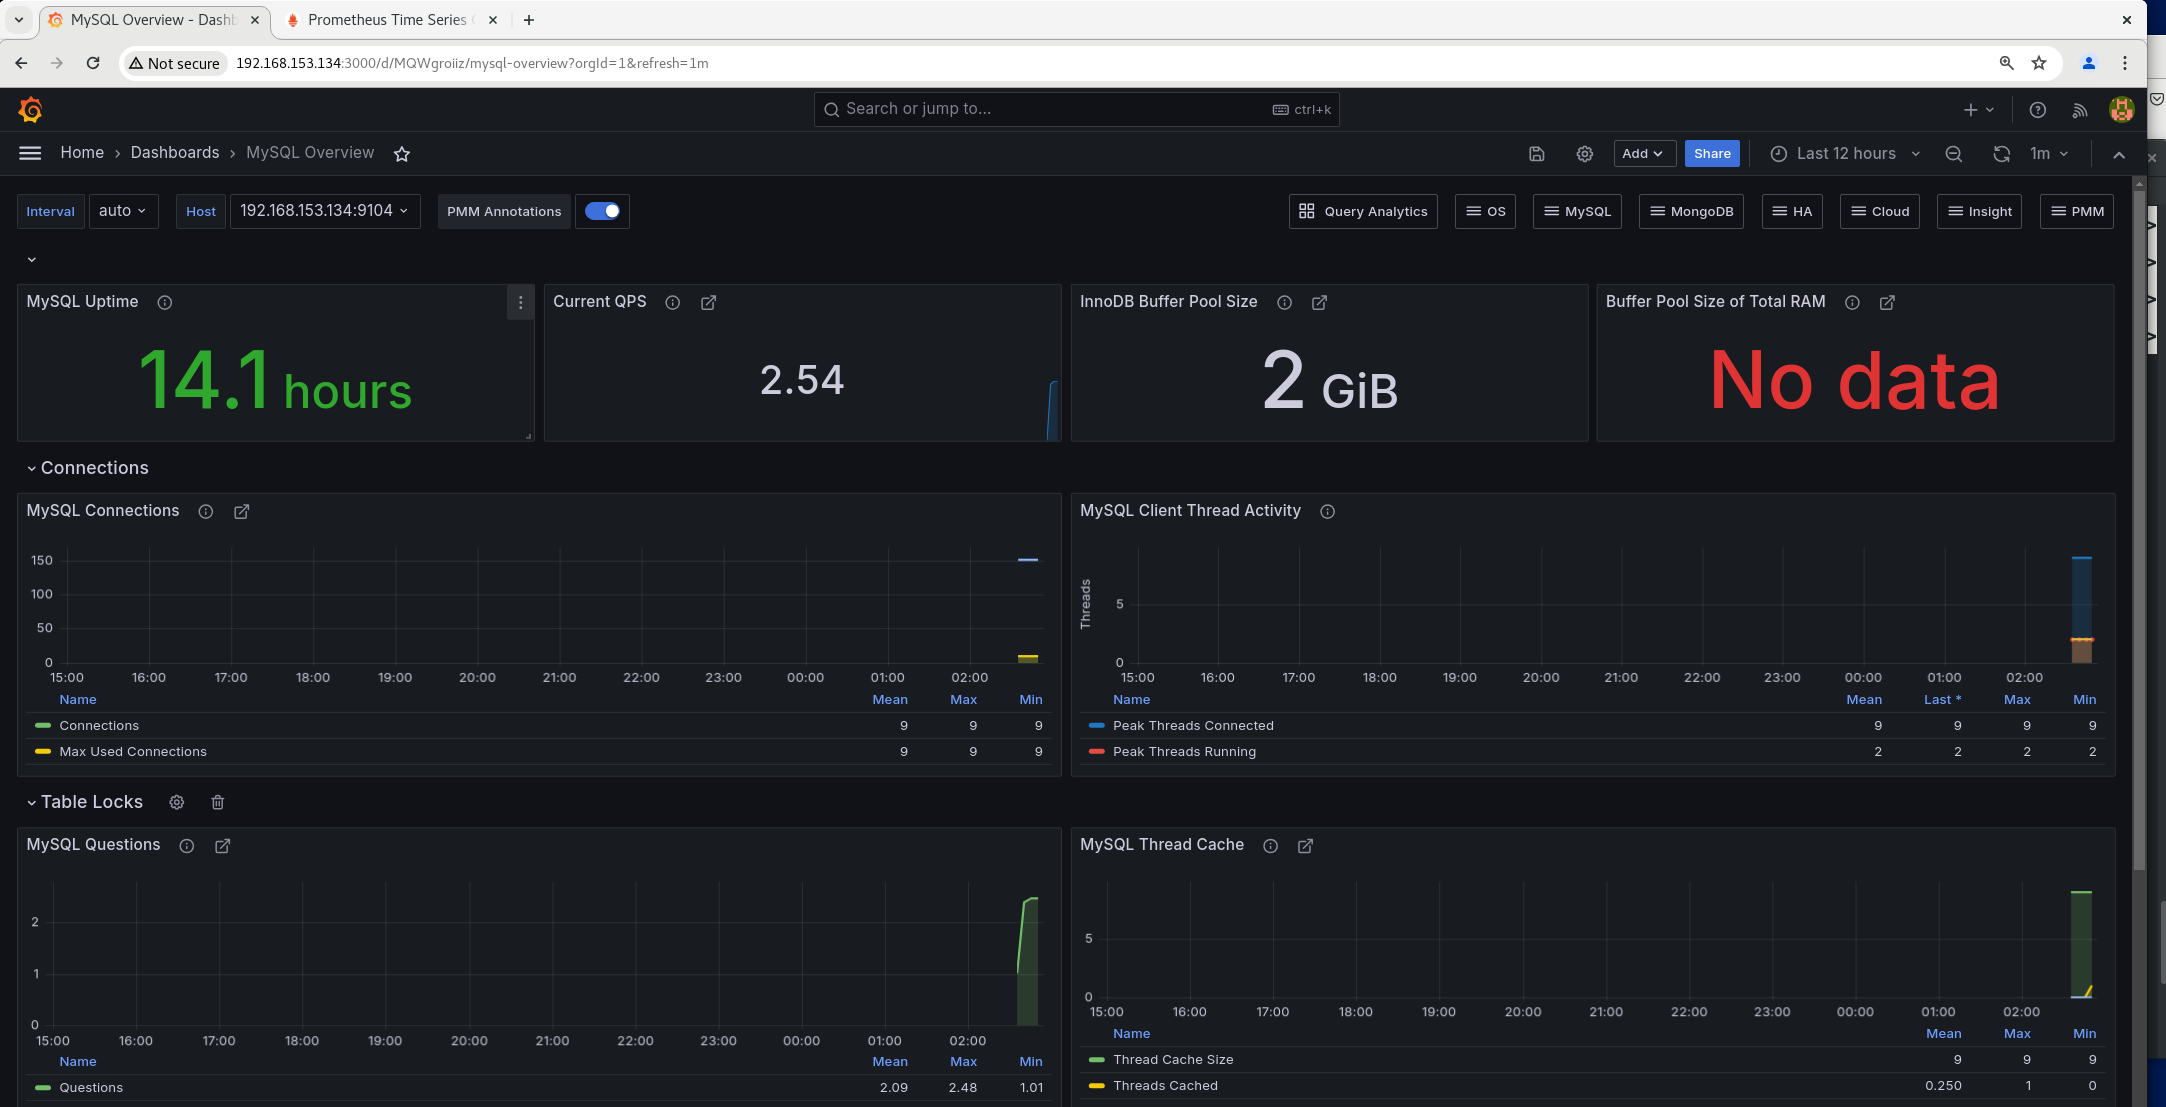

In [ ]:
Run some load on the database and check 
======================================================

[root@mysqlprod02 ~]# mysqlslap --concurrency=5,10,15 --iterations=5 --number-of-queries=50 --query="SELECT ID, Name, Age, Salary, 
                                Department, City, Country FROM loadtesttable WHERE Name like 'A%' AND Age BETWEEN 30 AND 40;" 
                                --create-schema=loadtestdb --verbose

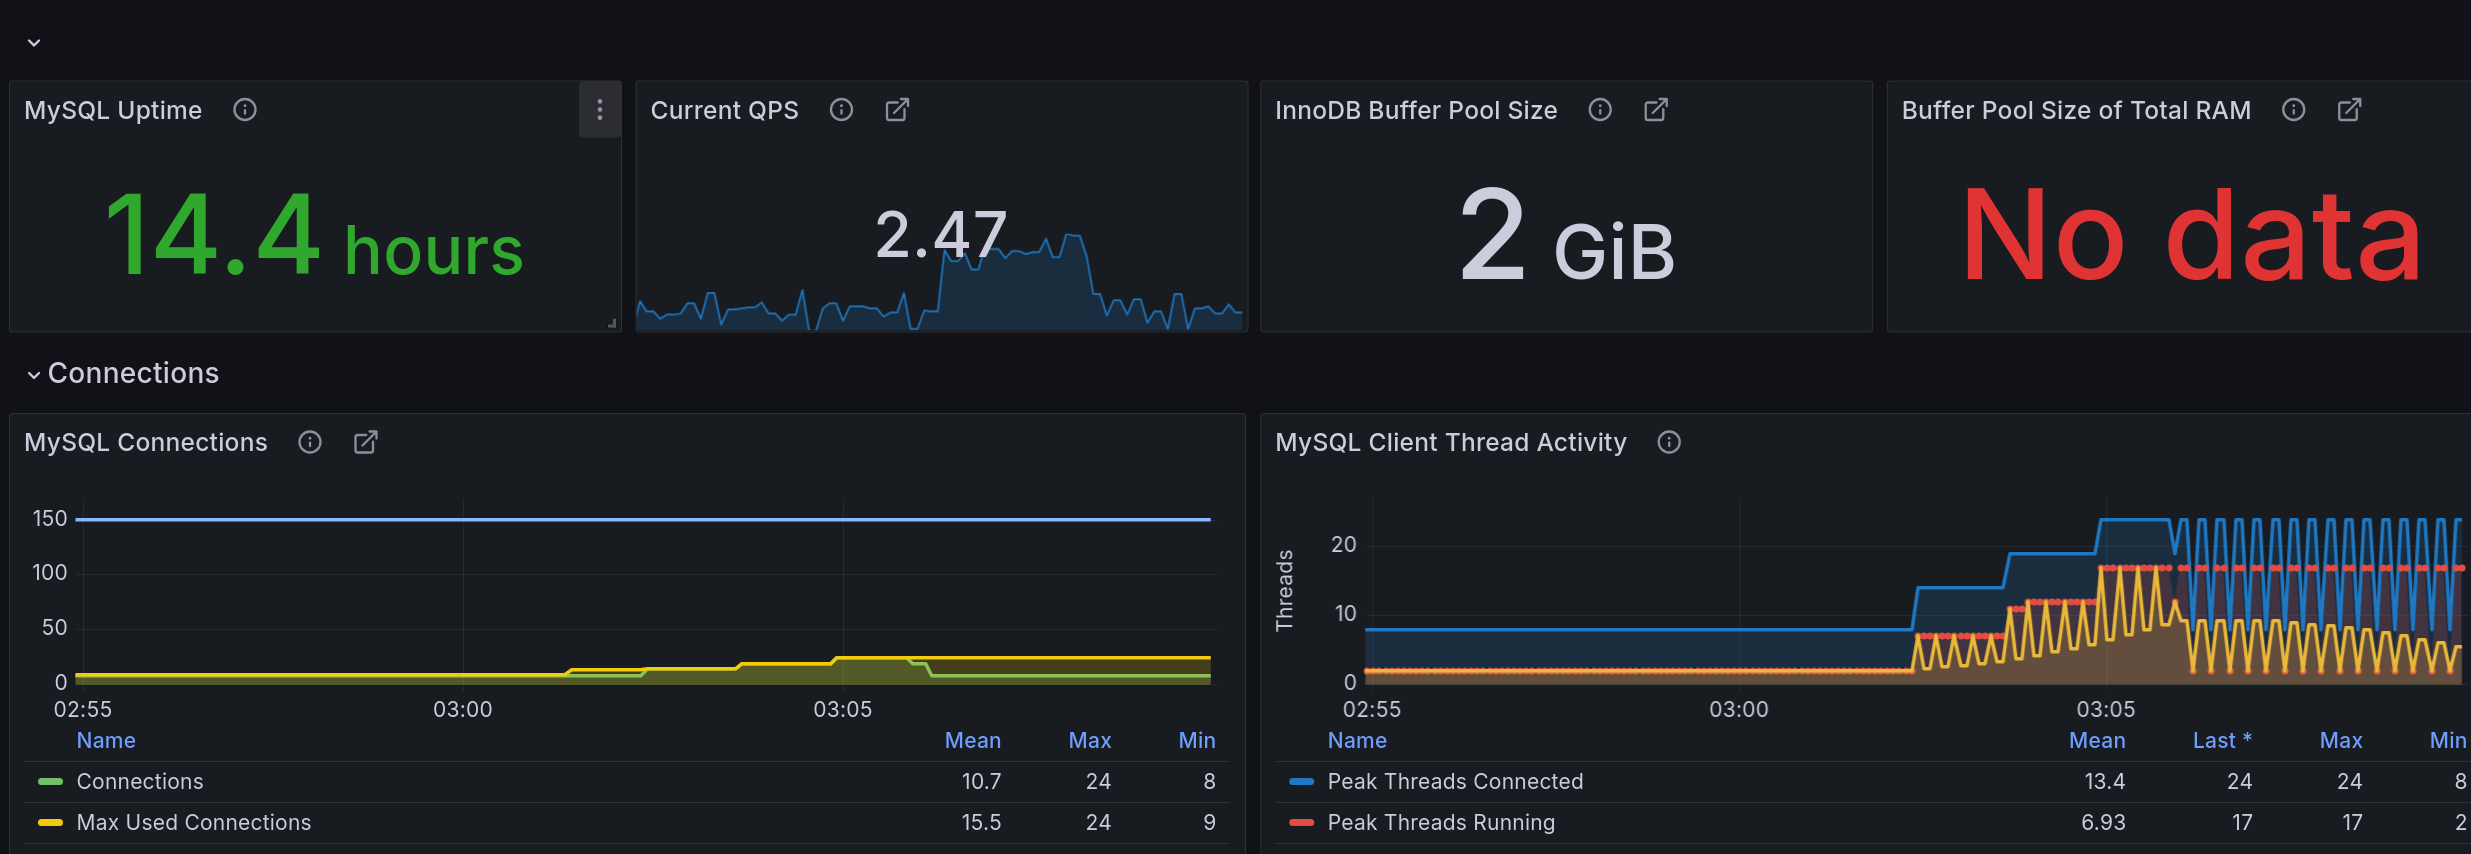